In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from utils.matrix_builder import create_expanded_feature_matrix, create_feature_matrix

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load Database
csv_hour_file = '../data/ta_metrics/final_price_ta_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

def regression_training(df, sliding_window, lag_price_window, DEBUG):
    """
    Train a regression model using a sliding window approach.
    
    Parameters:
    - df: DataFrame containing the dataset with features and target variable.
    - sliding_window: Number of rows to use for training in each sliding window.
    - lag_price_window: Number of previous days to use as features.
    
    Returns:
    - prediction_df: DataFrame containing predictions and actual values.
    """
    if DEBUG:
        print("Debug mode is ON. Detailed output will be printed.")

    # Validate input parameters
    if sliding_window <= lag_price_window:
        raise ValueError("Sliding window must be greater than to the price feature window.")

    training_sliding_window = sliding_window + 1  # +1 to include the next row as the test set

    # Calculate number of sliding window models to train in the dataset
    num_sliding_windows = len(df) - training_sliding_window
    if DEBUG:
        # Training for sliding windows and price feature window
        print(f"Training sliding window size: {training_sliding_window}, Price feature window size: {lag_price_window}")
        print(f"Number of rows in the dataset: {len(df)}")

    print(f"Number of models to train: {num_sliding_windows}")

    # Initialize lists to store predictions, actuals, and timestamps
    predictions_list = []
    actuals_list = []
    timestamps_list = []

    model = LinearRegression()  # Using Linear Regression as a baseline model

    for i in range(num_sliding_windows):
        if DEBUG:
            print(f"Processing sliding window {i + 1}/{num_sliding_windows}...")

        # Ensure we do not exceed the DataFrame length
        if i + training_sliding_window >= len(df):
            break  # Avoid index out of bounds
        
        sliding_window_set = df.iloc[i : i + training_sliding_window]

        if DEBUG:
            print(f"Sliding window should have {training_sliding_window} rows, got {len(sliding_window_set)} rows.")
            print(f"Sliding window set:\n{sliding_window_set}")
        
        # Create feature matrix and target variable for training
        X_train, y_train = create_expanded_feature_matrix(sliding_window_set, lag_price_window)
        if DEBUG:
            print(f"Feature matrix shape: {X_train.shape}, Target variable shape: {y_train.shape}")
            print(f"Feature matrix:\n{X_train.head()}")
            print(f"Target variable:\n{y_train.head()}")

        # Split for training and prediction
        X_train_fit = X_train.iloc[:-1]
        y_train_fit = y_train.iloc[:-1]

        X_to_predict = X_train.iloc[-1:]
        y_to_predict = y_train.iloc[-1]

        if DEBUG:
            print(f"Training features shape: {X_train_fit.shape}, Training target shape: {y_train_fit.shape}")
            print(f"Features to predict shape: {X_to_predict.shape}, Target to predict: {y_to_predict}")

        # Scale features for better convergence
        # scaler = StandardScaler()
        # X_train_fit_scaled = scaler.fit_transform(X_train_fit)
        # X_to_predict_scaled = scaler.transform(X_to_predict)

        # model.fit(X_train_fit_scaled, y_train_fit)
        # y_predicted = model.predict(X_to_predict_scaled)
        model.fit(X_train_fit, y_train_fit)
        y_predicted = model.predict(X_to_predict)
        
        # Add a lower bounds to set extreme negative predictions to 0, assuming prices cannot be negative
        if y_predicted[0] < 0:
            y_predicted[0] = 0

        # Store results
        predictions_list.append(y_predicted[0])
        actuals_list.append(y_to_predict)
        if 'Datetime' in sliding_window_set.columns:
            timestamps_list.append(sliding_window_set.iloc[-1]['Datetime'])
        else:
            timestamps_list.append(i + training_sliding_window - 1)

    # Create final prediction DataFrame
    prediction_df = pd.DataFrame({
        'Timestamp': timestamps_list,
        'Predicted': predictions_list,
        'Actual': actuals_list
    })


    return prediction_df



def regression_training_gt(df, sliding_window, lag_price_window, DEBUG):
    """
    Train a regression model using a sliding window approach.
    
    Parameters:
    - df: DataFrame containing the dataset with features and target variable.
    - sliding_window: Number of rows to use for training in each sliding window.
    - lag_price_window: Number of previous days to use as features.
    
    Returns:
    - prediction_df: DataFrame containing predictions and actual values.
    """
    if DEBUG:
        print("Debug mode is ON. Detailed output will be printed.")

    # Validate input parameters
    if sliding_window <= lag_price_window:
        raise ValueError("Sliding window must be greater than to the price feature window.")

    training_sliding_window = sliding_window + 1  # +1 to include the next row as the test set

    # Calculate number of sliding window models to train in the dataset
    num_sliding_windows = len(df) - training_sliding_window
    if DEBUG:
        # Training for sliding windows and price feature window
        print(f"Training sliding window size: {training_sliding_window}, Price feature window size: {lag_price_window}")
        print(f"Number of rows in the dataset: {len(df)}")

    print(f"Number of models to train: {num_sliding_windows}")

    # Initialize lists to store predictions, actuals, and timestamps
    predictions_list = []
    actuals_list = []
    timestamps_list = []

    model = LinearRegression()  # Using Linear Regression as a baseline model

    for i in range(num_sliding_windows):
        if DEBUG:
            print(f"Processing sliding window {i + 1}/{num_sliding_windows}...")

        # Ensure we do not exceed the DataFrame length
        if i + training_sliding_window >= len(df):
            break  # Avoid index out of bounds
        
        sliding_window_set = df.iloc[i : i + training_sliding_window]

        if DEBUG:
            print(f"Sliding window should have {training_sliding_window} rows, got {len(sliding_window_set)} rows.")
            print(f"Sliding window set:\n{sliding_window_set}")
        
        # Create feature matrix and target variable for training
        X_train, y_train = create_feature_matrix(sliding_window_set, lag_price_window)
        if DEBUG:
            print(f"Feature matrix shape: {X_train.shape}, Target variable shape: {y_train.shape}")
            print(f"Feature matrix:\n{X_train.head()}")
            print(f"Target variable:\n{y_train.head()}")

        # Split for training and prediction
        X_train_fit = X_train.iloc[:-1]
        y_train_fit = y_train.iloc[:-1]

        X_to_predict = X_train.iloc[-1:]
        y_to_predict = y_train.iloc[-1]

        if DEBUG:
            print(f"Training features shape: {X_train_fit.shape}, Training target shape: {y_train_fit.shape}")
            print(f"Features to predict shape: {X_to_predict.shape}, Target to predict: {y_to_predict}")

        model.fit(X_train_fit, y_train_fit)
        y_predicted = model.predict(X_to_predict)
        
        # Add a lower bounds to set extreme negative predictions to 0, assuming prices cannot be negative
        if y_predicted[0] < 0:
            y_predicted[0] = 0

        # Store results
        predictions_list.append(y_predicted[0])
        actuals_list.append(y_to_predict)
        if 'Datetime' in sliding_window_set.columns:
            timestamps_list.append(sliding_window_set.iloc[-1]['Datetime'])
        else:
            timestamps_list.append(i + training_sliding_window - 1)

    # Create final prediction DataFrame
    prediction_df = pd.DataFrame({
        'Timestamp': timestamps_list,
        'Predicted': predictions_list,
        'Actual': actuals_list
    })


    return prediction_df

Baseline (Ground truth)

In [2]:
# Debug parameter
DEBUG = False

# Define the Sliding Windows for the runs
sliding_windows = [7, 10, 15, 30, 90]  # of days to train on (matrix rows)
lag_price_windows = [1, 2, 4, 6]  # of previous days to use as features (matrix columns)
# lag_price_window must be less than sliding_window
percentiles = [99, 95, 85, 75]

# Initialize comprehensive results list
comprehensive_baseline_results = []

for sliding_window in sliding_windows:
    for lag_price_window in lag_price_windows:
        print(f"\nRunning regression training with sliding window: {sliding_window}, price feature window: {lag_price_window}")

        # Run the regression training
        prediction_df = regression_training_gt(df, sliding_window, lag_price_window, DEBUG)
        
        # Calculate overall metrics
        actuals_list = prediction_df['Actual'].values
        predictions_list = prediction_df['Predicted'].values
        timestamps_list = prediction_df['Timestamp'].values

        mse = mean_squared_error(actuals_list, predictions_list)
        mae = mean_absolute_error(actuals_list, predictions_list)
        r2 = r2_score(actuals_list, predictions_list)

        # Calculate prediction errors for filtering
        prediction_errors = np.abs(np.array(predictions_list) - np.array(actuals_list))

        # Calculate ES-like metric using prediction_errors
        worst_overall_error_threshold = np.percentile(prediction_errors, 95)  # worst 5% of errors
        worst_overall_indices = prediction_errors >= worst_overall_error_threshold
        avg_worst_error = np.mean(prediction_errors[worst_overall_indices])

        # Add overall results (100% percentile)
        comprehensive_baseline_results.append({
            'sliding_window': sliding_window,
            'lag_price_window': lag_price_window,
            'percentile': 100,
            'data_points': len(predictions_list),
            'mse': mse,
            'mae': mae,
            'r2': r2,
            'worst_avg_error': avg_worst_error
        })

        # for p in percentiles:
        #     # Filter by best predictions (lowest errors)
        #     best_error_threshold = np.percentile(prediction_errors, p)
            
        #     # Expectation Shortfall like metric - worst predictions analysis
        #     # Filter by best predictions (highest errors)
        #     worst_error_threshold = np.percentile(prediction_errors, 100 - p) # equivalent to worst_percentiles

        #     # Get indices of best/worst predictions 
        #     best_indices = prediction_errors <= best_error_threshold # with errors below threshold
        #     worst_indices = prediction_errors >= worst_error_threshold # with errors above threshold

        #     filtered_actuals = np.array(actuals_list)[best_indices]
        #     filtered_predictions = np.array(predictions_list)[best_indices]

        #     if len(filtered_actuals) > 0:
        #         mse_p = mean_squared_error(filtered_actuals, filtered_predictions)
        #         mae_p = mean_absolute_error(filtered_actuals, filtered_predictions)
        #         r2_p = r2_score(filtered_actuals, filtered_predictions)
        #         avg_error_wp = np.mean(prediction_errors[worst_indices])

        #         # Add to full comprehensive results
        #         comprehensive_baseline_results.append({
        #             'sliding_window': sliding_window,
        #             'lag_price_window': lag_price_window,
        #             'percentile': p,
        #             'data_points': len(filtered_predictions),
        #             'mse': mse_p,
        #             'mae': mae_p,
        #             'r2': r2_p,
        #             'worst_avg_error': avg_error_wp
        #         })
        #     else:
        #         # Add entry for no data available
        #         comprehensive_baseline_results.append({
        #             'sliding_window': sliding_window,
        #             'lag_price_window': lag_price_window,
        #             'percentile': p,
        #             'data_points': 0,
        #             'mse': np.nan,
        #             'mae': np.nan,
        #             'r2': np.nan,
        #             'worst_avg_error': np.nan
        #         })


        for p in percentiles:
            # Filter by best predictions (lowest errors)
            best_error_threshold = np.percentile(prediction_errors, p)
            
            # Get indices of best predictions 
            best_indices = prediction_errors <= best_error_threshold

            filtered_actuals = np.array(actuals_list)[best_indices]
            filtered_predictions = np.array(predictions_list)[best_indices]
            filtered_errors = prediction_errors[best_indices]

            if len(filtered_actuals) > 0:
                mse_p = mean_squared_error(filtered_actuals, filtered_predictions)
                mae_p = mean_absolute_error(filtered_actuals, filtered_predictions)
                r2_p = r2_score(filtered_actuals, filtered_predictions)
                
                # FIXED: Calculate worst 5% WITHIN the filtered subset
                worst_5_percent_threshold = np.percentile(filtered_errors, 95)
                worst_5_percent_indices = filtered_errors >= worst_5_percent_threshold
                worst_5_percent_errors = filtered_errors[worst_5_percent_indices]
                avg_worst_5_percent = np.mean(worst_5_percent_errors)

                comprehensive_baseline_results.append({
                    'sliding_window': sliding_window,
                    'lag_price_window': lag_price_window,
                    'percentile': p,
                    'data_points': len(filtered_predictions),
                    'mse': mse_p,
                    'mae': mae_p,
                    'r2': r2_p,
                    'worst_avg_error': avg_worst_5_percent  # FIXED: Now actually the average of worst 5%
                })
            else:
                # Add entry for no data available
                comprehensive_baseline_results.append({
                    'sliding_window': sliding_window,
                    'lag_price_window': lag_price_window,
                    'percentile': p,
                    'data_points': 0,
                    'mse': np.nan,
                    'mae': np.nan,
                    'r2': np.nan,
                    'worst_avg_error': np.nan
                })


Running regression training with sliding window: 7, price feature window: 1
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 2
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 4
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 6
Number of models to train: 2252

Running regression training with sliding window: 10, price feature window: 1
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 2
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 4
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 6
Number of models to train: 2249

Running regression training with sliding window: 15, price feature window: 1
Number of models to train: 2244

Running regre

In [3]:
# Create comprehensive DataFrame
comprehensive_gt_df = pd.DataFrame(comprehensive_baseline_results)

# Save to CSV
comprehensive_gt_df.to_csv('regression_baseline_results.csv', index=False)
print(f"\nResults saved to 'regression_baseline_results.csv'")


Results saved to 'regression_baseline_results.csv'


In [4]:
# Pareto frontier approach - find models that are best in multiple metrics
def find_pareto_optimal_models(df, percentile=99):
    """Find models that are optimal in at least one metric"""
    subset = df[df['percentile'] == percentile].copy()
    
    # Rank by each metric (lower rank = better)
    subset['mae_rank'] = subset['mae'].rank(ascending=True)
    subset['mse_rank'] = subset['mse'].rank(ascending=True)  # Lower MSE is better
    subset['r2_rank'] = subset['r2'].rank(ascending=False)  # Higher R² is better
    subset['worst_error_rank'] = subset['worst_avg_error'].rank(ascending=True)
    
    # Find average rank across all 4 metrics
    subset['avg_rank'] = (subset['mae_rank'] + subset['mse_rank'] + 
                         subset['r2_rank'] + subset['worst_error_rank']) / 4
    
    return subset.sort_values('avg_rank')

# Get top models by multiple criteria
pareto_gt = find_pareto_optimal_models(comprehensive_gt_df)
# pareto_fe = find_pareto_optimal_models(comprehensive_fe_df)

print("Top 3 models by multi-criteria ranking (including MSE):")
print(pareto_gt[['sliding_window', 'lag_price_window', 'mae', 'mse', 'r2', 'worst_avg_error', 'avg_rank']].head(3))

Top 3 models by multi-criteria ranking (including MSE):
    sliding_window  lag_price_window        mae         mse        r2  \
61              30                 1  15.195883  519.777167  0.842020   
66              30                 2  15.472885  530.800172  0.841583   
81              90                 1  15.817626  544.762200  0.838825   

    worst_avg_error  avg_rank  
61        66.472754      1.50  
66        66.299953      2.00  
81        67.367107      4.25  


In [16]:
best_baseline_sliding_window = int(pareto_gt.head(1)['sliding_window'].values[0])
best_baseline_lag_price_window = int(pareto_gt.head(1)['lag_price_window'].values[0])

# recalculate the best model predictions
print(f"Best Baseline Model - Sliding Window: {best_baseline_sliding_window}, Lag Price Window: {best_baseline_lag_price_window}")

# Run the regression training for the best model
prediction_df_best_baseline = regression_training_gt(df, best_baseline_sliding_window, best_baseline_lag_price_window, DEBUG=False)

Best Baseline Model - Sliding Window: 30, Lag Price Window: 1
Number of models to train: 2229


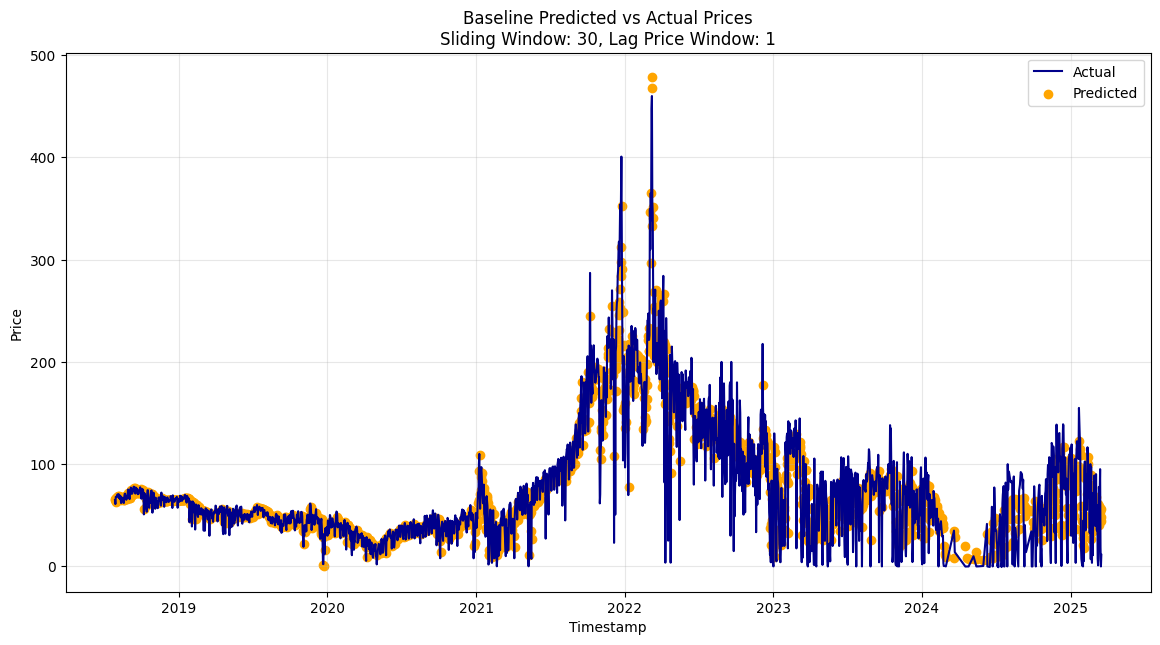

In [17]:
# # Calculate prediction errors from the current model run
# current_actuals = prediction_df_best_baseline['Actual'].values
# current_predictions = prediction_df_best_baseline['Predicted'].values
# current_prediction_errors = np.abs(current_predictions - current_actuals)

# # Limit results to the 99th percentile using CURRENT prediction errors
# best_error_threshold = np.percentile(current_prediction_errors, 99)  # Use current_prediction_errors
# # Get indices of best predictions using CURRENT prediction errors
# best_indices = current_prediction_errors <= best_error_threshold  # Use current_prediction_errors

# # Filter the DataFrame directly
# prediction_df_best_baseline = prediction_df_best_baseline[best_indices].reset_index(drop=True)

import matplotlib.pyplot as plt
# Plotting the predictions for the best model as scatter plot over the actuals as line plot
plt.figure(figsize=(14, 7))
plt.plot(prediction_df_best_baseline['Timestamp'], prediction_df_best_baseline['Actual'], label='Actual', color='darkblue')
plt.scatter(prediction_df_best_baseline['Timestamp'], prediction_df_best_baseline['Predicted'], label='Predicted', color='orange')
plt.title(f"Baseline Predicted vs Actual Prices\nSliding Window: {best_baseline_sliding_window}, Lag Price Window: {best_baseline_lag_price_window}")
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('regression_baseline_best_model.png', dpi=300, bbox_inches='tight')
plt.show()


In [7]:
# COMPREHENSIVE VERIFICATION TEST - Test both 99th percentile filtering AND 95th percentile worst errors
def comprehensive_verification_test():
    """
    Test the verification function for both:
    1. 99th percentile filtering (keeping best 99% of predictions)
    2. 95th percentile worst errors (worst 5% within that filtered subset)
    """
    
    print("=== COMPREHENSIVE VERIFICATION TEST ===")
    
    # Get the best model parameters
    best_sliding_window = int(pareto_gt.head(1)['sliding_window'].values[0])
    best_lag_window = int(pareto_gt.head(1)['lag_price_window'].values[0])
    
    # Step 1: Generate full unfiltered predictions (same as comprehensive results)
    print(f"\n1. Generating full predictions with sliding_window={best_sliding_window}, lag_window={best_lag_window}")
    prediction_df_full = regression_training_gt(df, best_sliding_window, best_lag_window, DEBUG=False)
    
    full_predictions = prediction_df_full['Predicted'].values
    full_actuals = prediction_df_full['Actual'].values
    full_errors = np.abs(full_predictions - full_actuals)
    
    print(f"   Full dataset size: {len(full_predictions)}")
    print(f"   Full error range: {np.min(full_errors):.2f} to {np.max(full_errors):.2f}")
    
    # Step 2: Apply 99th percentile filtering (keep best 99%)
    print(f"\n2. Applying 99th percentile filtering (keep best 99% predictions)")
    percentile_99_threshold = np.percentile(full_errors, 99)
    best_99_indices = full_errors <= percentile_99_threshold
    
    filtered_predictions = full_predictions[best_99_indices]
    filtered_actuals = full_actuals[best_99_indices]
    filtered_errors = full_errors[best_99_indices]
    
    print(f"   99th percentile error threshold: {percentile_99_threshold:.2f}")
    print(f"   Filtered dataset size: {len(filtered_predictions)} ({len(filtered_predictions)/len(full_predictions)*100:.1f}%)")
    print(f"   Filtered error range: {np.min(filtered_errors):.2f} to {np.max(filtered_errors):.2f}")
    
    # Step 3: Calculate worst 5% errors WITHIN the filtered 99% subset
    print(f"\n3. Calculating worst 5% errors WITHIN the filtered 99% subset")
    
    # Method 1: Using percentile threshold (current method)
    worst_5_threshold = np.percentile(filtered_errors, 95)
    worst_5_indices = filtered_errors >= worst_5_threshold
    worst_5_errors_method1 = filtered_errors[worst_5_indices]
    avg_worst_5_method1 = np.mean(worst_5_errors_method1)
    
    # Method 2: Direct sorting
    num_worst_5 = int(len(filtered_errors) * 0.05)  # 5% of filtered data
    sorted_filtered_errors = np.sort(filtered_errors)[::-1]  # Descending order
    worst_5_errors_method2 = sorted_filtered_errors[:num_worst_5]
    avg_worst_5_method2 = np.mean(worst_5_errors_method2)
    
    # Method 3: Using argsort
    worst_5_indices_method3 = np.argsort(filtered_errors)[-num_worst_5:]
    worst_5_errors_method3 = filtered_errors[worst_5_indices_method3]
    avg_worst_5_method3 = np.mean(worst_5_errors_method3)
    
    print(f"   95th percentile threshold in filtered data: {worst_5_threshold:.2f}")
    print(f"   Number of worst 5% predictions: {len(worst_5_errors_method1)} (expected: {num_worst_5})")
    print(f"   Actual percentage: {len(worst_5_errors_method1)/len(filtered_errors)*100:.2f}%")
    
    print(f"\n   Average worst 5% error (Method 1 - Percentile): {avg_worst_5_method1:.2f}")
    print(f"   Average worst 5% error (Method 2 - Direct Sort): {avg_worst_5_method2:.2f}")
    print(f"   Average worst 5% error (Method 3 - Argsort): {avg_worst_5_method3:.2f}")
    
    methods_match = np.allclose([avg_worst_5_method1, avg_worst_5_method2, avg_worst_5_method3], 
                               avg_worst_5_method1, rtol=1e-5)
    print(f"   All methods match: {methods_match}")
    
    # Step 4: Compare with stored comprehensive results
    print(f"\n4. Comparing with stored comprehensive results")
    stored_result = comprehensive_gt_df[
        (comprehensive_gt_df['sliding_window'] == best_sliding_window) & 
        (comprehensive_gt_df['lag_price_window'] == best_lag_window) & 
        (comprehensive_gt_df['percentile'] == 99)
    ]
    
    if len(stored_result) > 0:
        stored_worst_avg = stored_result['worst_avg_error'].values[0]
        stored_data_points = stored_result['data_points'].values[0]
        
        print(f"   Stored worst_avg_error (99th percentile): {stored_worst_avg:.2f}")
        print(f"   Calculated worst_avg_error: {avg_worst_5_method1:.2f}")
        print(f"   Stored data_points: {stored_data_points}")
        print(f"   Calculated data_points: {len(filtered_predictions)}")
        
        results_match = np.allclose(stored_worst_avg, avg_worst_5_method1, rtol=1e-3)
        data_points_match = stored_data_points == len(filtered_predictions)
        
        print(f"   Results match: {results_match}")
        print(f"   Data points match: {data_points_match}")
        
        if results_match and data_points_match:
            print(f"   ✅ VERIFICATION SUCCESSFUL!")
        else:
            print(f"   ❌ VERIFICATION FAILED!")
    else:
        print(f"   ❌ No stored result found for comparison!")
    
    # Step 5: Also verify the overall (100th percentile) calculation
    print(f"\n5. Verifying overall (100th percentile) calculation")
    
    # Calculate worst 5% of ALL data (not filtered)
    full_worst_5_threshold = np.percentile(full_errors, 95)
    full_worst_5_indices = full_errors >= full_worst_5_threshold
    full_avg_worst_5 = np.mean(full_errors[full_worst_5_indices])
    
    # Compare with stored overall result
    stored_overall = comprehensive_gt_df[
        (comprehensive_gt_df['sliding_window'] == best_sliding_window) & 
        (comprehensive_gt_df['lag_price_window'] == best_lag_window) & 
        (comprehensive_gt_df['percentile'] == 100)
    ]
    
    if len(stored_overall) > 0:
        stored_overall_worst = stored_overall['worst_avg_error'].values[0]
        print(f"   Stored worst_avg_error (100th percentile): {stored_overall_worst:.2f}")
        print(f"   Calculated worst_avg_error (full data): {full_avg_worst_5:.2f}")
        
        overall_match = np.allclose(stored_overall_worst, full_avg_worst_5, rtol=1e-3)
        print(f"   Overall results match: {overall_match}")
        
        if overall_match:
            print(f"   ✅ OVERALL VERIFICATION SUCCESSFUL!")
        else:
            print(f"   ❌ OVERALL VERIFICATION FAILED!")
    
    return {
        'filtered_99_match': results_match if len(stored_result) > 0 else False,
        'overall_100_match': overall_match if len(stored_overall) > 0 else False,
        'methods_consistent': methods_match
    }

# Run the comprehensive verification test
verification_summary = comprehensive_verification_test()

print(f"\n=== VERIFICATION SUMMARY ===")
print(f"99th percentile filtering + worst 5%: {'✅ PASS' if verification_summary['filtered_99_match'] else '❌ FAIL'}")
print(f"100th percentile (overall) worst 5%: {'✅ PASS' if verification_summary['overall_100_match'] else '❌ FAIL'}")
print(f"All calculation methods consistent: {'✅ PASS' if verification_summary['methods_consistent'] else '❌ FAIL'}")

=== COMPREHENSIVE VERIFICATION TEST ===

1. Generating full predictions with sliding_window=30, lag_window=1
Number of models to train: 2229
   Full dataset size: 2229
   Full error range: 0.00 to 212.89

2. Applying 99th percentile filtering (keep best 99% predictions)
   99th percentile error threshold: 90.76
   Filtered dataset size: 2206 (99.0%)
   Filtered error range: 0.00 to 88.73

3. Calculating worst 5% errors WITHIN the filtered 99% subset
   95th percentile threshold in filtered data: 52.78
   Number of worst 5% predictions: 111 (expected: 110)
   Actual percentage: 5.03%

   Average worst 5% error (Method 1 - Percentile): 66.47
   Average worst 5% error (Method 2 - Direct Sort): 66.60
   Average worst 5% error (Method 3 - Argsort): 66.60
   All methods match: False

4. Comparing with stored comprehensive results
   Stored worst_avg_error (99th percentile): 66.47
   Calculated worst_avg_error: 66.47
   Stored data_points: 2206
   Calculated data_points: 2206
   Results match

Number of models to train: 2229


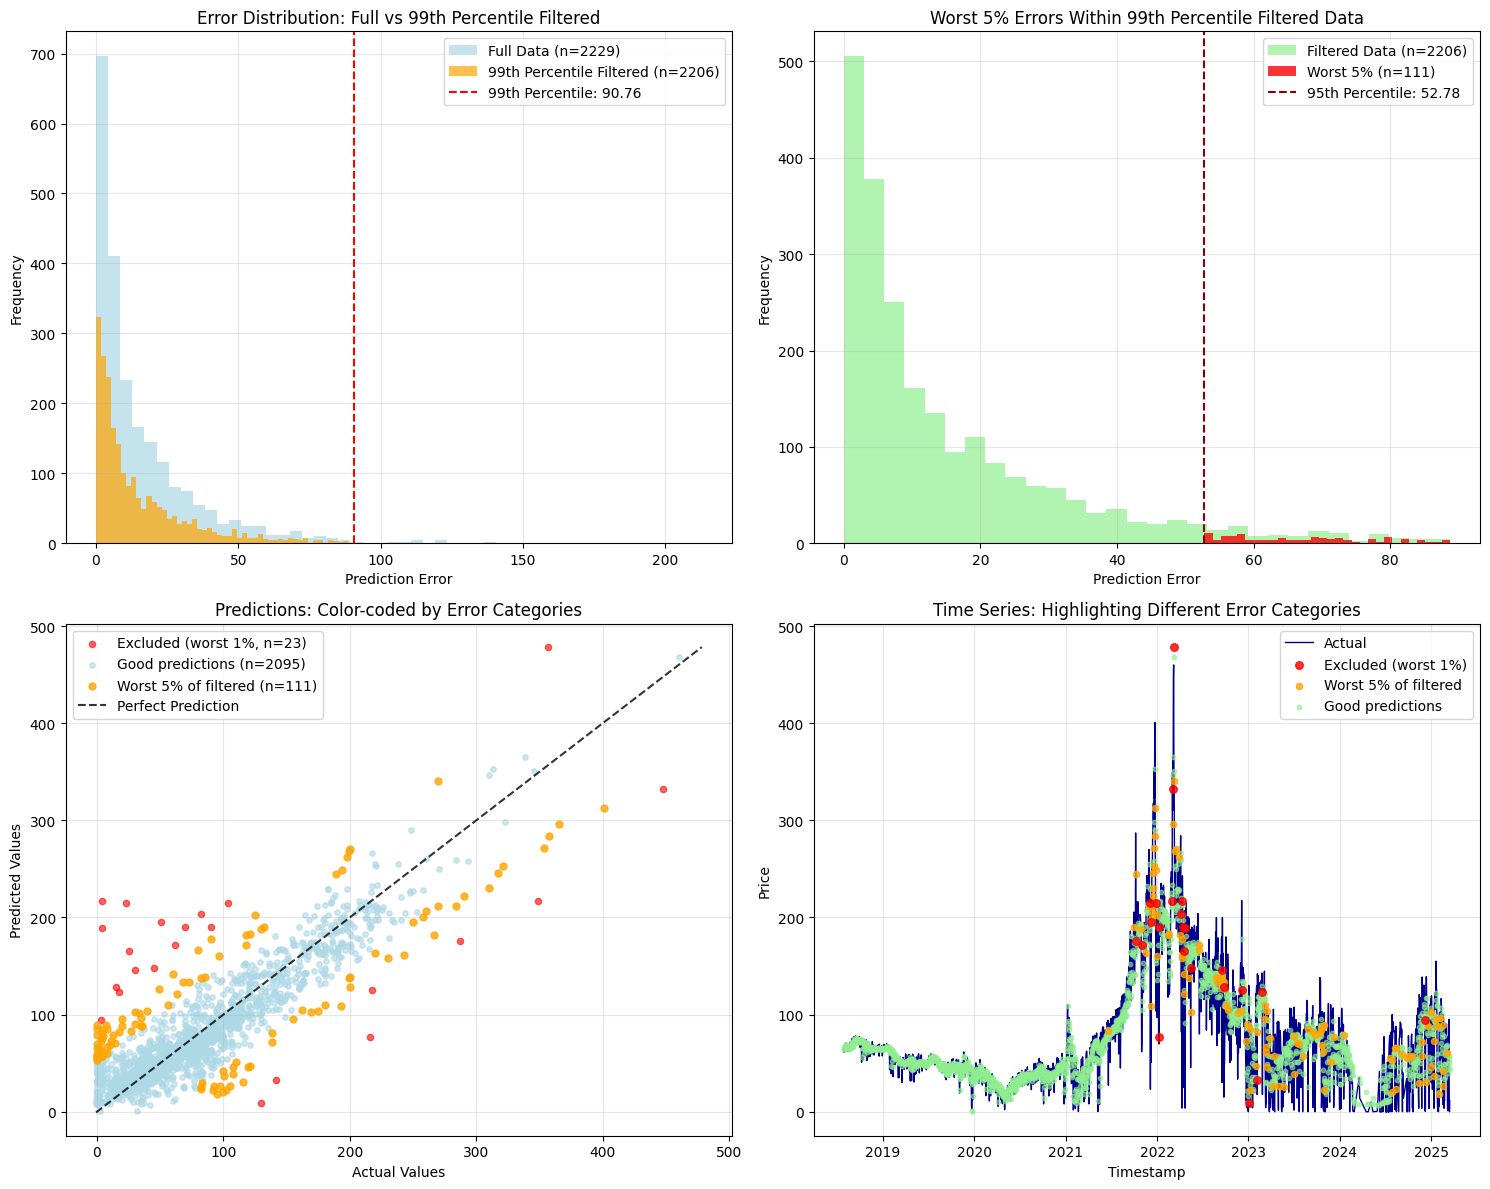


=== GRAPHICAL VERIFICATION SUMMARY ===
Full dataset: 2229 predictions
99th percentile threshold: 90.76
Excluded (worst 1%): 23 predictions
Kept (best 99%): 2206 predictions
95th percentile of filtered: 52.78
Worst 5% of filtered: 111 predictions
Average error of worst 5%: 66.47


In [8]:
# GRAPHICAL VERIFICATION OF 99th PERCENTILE FILTERING AND WORST 5%
def graphical_verification():
    """
    Create visualizations to verify the 99th percentile filtering and worst 5% calculations
    """
    
    # Get the best model parameters
    best_sliding_window = int(pareto_gt.head(1)['sliding_window'].values[0])
    best_lag_window = int(pareto_gt.head(1)['lag_price_window'].values[0])
    
    # Generate full predictions
    prediction_df_full = regression_training_gt(df, best_sliding_window, best_lag_window, DEBUG=False)
    full_predictions = prediction_df_full['Predicted'].values
    full_actuals = prediction_df_full['Actual'].values
    full_errors = np.abs(full_predictions - full_actuals)
    
    # Apply 99th percentile filtering
    percentile_99_threshold = np.percentile(full_errors, 99)
    best_99_indices = full_errors <= percentile_99_threshold
    filtered_errors = full_errors[best_99_indices]
    filtered_predictions = full_predictions[best_99_indices]
    filtered_actuals = full_actuals[best_99_indices]
    
    # Calculate worst 5% within filtered data
    worst_5_threshold = np.percentile(filtered_errors, 95)
    worst_5_indices = filtered_errors >= worst_5_threshold
    
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Error distribution - Full vs Filtered
    ax1.hist(full_errors, bins=50, alpha=0.7, label=f'Full Data (n={len(full_errors)})', color='lightblue')
    ax1.hist(filtered_errors, bins=50, alpha=0.7, label=f'99th Percentile Filtered (n={len(filtered_errors)})', color='orange')
    ax1.axvline(percentile_99_threshold, color='red', linestyle='--', label=f'99th Percentile: {percentile_99_threshold:.2f}')
    ax1.set_xlabel('Prediction Error')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Error Distribution: Full vs 99th Percentile Filtered')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Worst 5% within filtered data
    ax2.hist(filtered_errors, bins=30, alpha=0.7, label=f'Filtered Data (n={len(filtered_errors)})', color='lightgreen')
    ax2.hist(filtered_errors[worst_5_indices], bins=30, alpha=0.8, label=f'Worst 5% (n={np.sum(worst_5_indices)})', color='red')
    ax2.axvline(worst_5_threshold, color='darkred', linestyle='--', label=f'95th Percentile: {worst_5_threshold:.2f}')
    ax2.set_xlabel('Prediction Error')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Worst 5% Errors Within 99th Percentile Filtered Data')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Predictions scatter plot with color coding
    # Color code: blue=good predictions, orange=filtered out, red=worst 5%
    excluded_indices = ~best_99_indices
    
    ax3.scatter(full_actuals[excluded_indices], full_predictions[excluded_indices], 
               alpha=0.6, c='red', s=20, label=f'Excluded (worst 1%, n={np.sum(excluded_indices)})')
    ax3.scatter(filtered_actuals[~worst_5_indices], filtered_predictions[~worst_5_indices], 
               alpha=0.6, c='lightblue', s=15, label=f'Good predictions (n={np.sum(~worst_5_indices)})')
    ax3.scatter(filtered_actuals[worst_5_indices], filtered_predictions[worst_5_indices], 
               alpha=0.8, c='orange', s=25, label=f'Worst 5% of filtered (n={np.sum(worst_5_indices)})')
    
    # Perfect prediction line
    min_val = min(np.min(full_actuals), np.min(full_predictions))
    max_val = max(np.max(full_actuals), np.max(full_predictions))
    ax3.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8, label='Perfect Prediction')
    
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title('Predictions: Color-coded by Error Categories')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Time series with highlighting
    timestamps = prediction_df_full['Timestamp'].values
    
    ax4.plot(timestamps, full_actuals, label='Actual', color='darkblue', linewidth=1)
    ax4.scatter(timestamps[excluded_indices], full_predictions[excluded_indices], 
               c='red', s=30, alpha=0.8, label=f'Excluded (worst 1%)', zorder=5)
    ax4.scatter(timestamps[best_99_indices][worst_5_indices], filtered_predictions[worst_5_indices], 
               c='orange', s=20, alpha=0.8, label=f'Worst 5% of filtered', zorder=4)
    ax4.scatter(timestamps[best_99_indices][~worst_5_indices], filtered_predictions[~worst_5_indices], 
               c='lightgreen', s=10, alpha=0.6, label=f'Good predictions', zorder=3)
    
    ax4.set_xlabel('Timestamp')
    ax4.set_ylabel('Price')
    ax4.set_title('Time Series: Highlighting Different Error Categories')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('verification_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary statistics
    print(f"\n=== GRAPHICAL VERIFICATION SUMMARY ===")
    print(f"Full dataset: {len(full_errors)} predictions")
    print(f"99th percentile threshold: {percentile_99_threshold:.2f}")
    print(f"Excluded (worst 1%): {np.sum(excluded_indices)} predictions")
    print(f"Kept (best 99%): {len(filtered_errors)} predictions")
    print(f"95th percentile of filtered: {worst_5_threshold:.2f}")
    print(f"Worst 5% of filtered: {np.sum(worst_5_indices)} predictions")
    print(f"Average error of worst 5%: {np.mean(filtered_errors[worst_5_indices]):.2f}")
    
    return {
        'full_errors': full_errors,
        'filtered_errors': filtered_errors,
        'worst_5_errors': filtered_errors[worst_5_indices],
        'percentile_99_threshold': percentile_99_threshold,
        'worst_5_threshold': worst_5_threshold
    }

# Run graphical verification
verification_data = graphical_verification()

Feature engineering version:

In [9]:
# Debug parameter
DEBUG = False

# Define the Sliding Windows for the runs
sliding_windows = [7, 10, 15, 30, 90]  # of days to train on (matrix rows)
lag_price_windows = [1, 2, 4, 6]  # of previous days to use as features (matrix columns)
# lag_price_window must be less than sliding_window
percentiles = [99, 95, 85, 75]

# Initialize comprehensive results list
comprehensive_fe_results = []

for sliding_window in sliding_windows:
    for lag_price_window in lag_price_windows:
        print(f"\nRunning regression training with sliding window: {sliding_window}, price feature window: {lag_price_window}")

        # Run the regression training
        prediction_df = regression_training(df, sliding_window, lag_price_window, DEBUG)
        
        # Calculate overall metrics
        actuals_list = prediction_df['Actual'].values
        predictions_list = prediction_df['Predicted'].values
        timestamps_list = prediction_df['Timestamp'].values

        mse = mean_squared_error(actuals_list, predictions_list)
        mae = mean_absolute_error(actuals_list, predictions_list)
        r2 = r2_score(actuals_list, predictions_list)
        
        # Expectation Shortfall - Calculate metrics for top X worst predictions
        # # Calculate prediction errors for filtering
        # prediction_errors = np.abs(np.array(predictions_list) - np.array(actuals_list))

        # # Add overall results (100% percentile)
        # comprehensive_fe_results.append({
        #     'sliding_window': sliding_window,
        #     'lag_price_window': lag_price_window,
        #     'percentile': 100,
        #     'data_points': len(predictions_list),
        #     'mse': mse,
        #     'mae': mae,
        #     'r2': r2,
        #     'avg_error': np.mean(prediction_errors)
        # })
        # Calculate prediction errors for filtering
        prediction_errors = np.abs(np.array(predictions_list) - np.array(actuals_list))

        # FIXED: Calculate worst 5% error for overall results (same as baseline)
        worst_overall_error_threshold = np.percentile(prediction_errors, 95)  # worst 5% of errors
        worst_overall_indices = prediction_errors >= worst_overall_error_threshold
        avg_worst_error = np.mean(prediction_errors[worst_overall_indices])

        # Add overall results (100% percentile)
        comprehensive_fe_results.append({
            'sliding_window': sliding_window,
            'lag_price_window': lag_price_window,
            'percentile': 100,
            'data_points': len(predictions_list),
            'mse': mse,
            'mae': mae,
            'r2': r2,
            'worst_avg_error': avg_worst_error  # FIXED: Now consistent with baseline
        })
        
        # for p in percentiles:
        #     # Filter by best predictions (lowest errors)
        #     best_error_threshold = np.percentile(prediction_errors, p)
            
        #     # Expectation Shortfall like metric - worst predictions analysis
        #     # Filter by best predictions (highest errors)
        #     worst_error_threshold = np.percentile(prediction_errors, 100 - p) # equivalent to worst_percentiles

        #     # Get indices of best/worst predictions 
        #     best_indices = prediction_errors <= best_error_threshold # with errors below threshold
        #     worst_indices = prediction_errors >= worst_error_threshold # with errors above threshold

        #     filtered_actuals = np.array(actuals_list)[best_indices]
        #     filtered_predictions = np.array(predictions_list)[best_indices]

        #     if len(filtered_actuals) > 0:
        #         mse_p = mean_squared_error(filtered_actuals, filtered_predictions)
        #         mae_p = mean_absolute_error(filtered_actuals, filtered_predictions)
        #         r2_p = r2_score(filtered_actuals, filtered_predictions)
        #         avg_error_wp = np.mean(prediction_errors[worst_indices])

        #         # Add to full comprehensive results
        #         comprehensive_fe_results.append({
        #             'sliding_window': sliding_window,
        #             'lag_price_window': lag_price_window,
        #             'percentile': p,
        #             'data_points': len(filtered_predictions),
        #             'mse': mse_p,
        #             'mae': mae_p,
        #             'r2': r2_p,
        #             'worst_avg_error': avg_error_wp
        #         })
        for p in percentiles:
            # Filter by best predictions (lowest errors)
            best_error_threshold = np.percentile(prediction_errors, p)
            
            # Get indices of best predictions 
            best_indices = prediction_errors <= best_error_threshold

            filtered_actuals = np.array(actuals_list)[best_indices]
            filtered_predictions = np.array(predictions_list)[best_indices]
            filtered_errors = prediction_errors[best_indices]  # ADD THIS LINE

            if len(filtered_actuals) > 0:
                mse_p = mean_squared_error(filtered_actuals, filtered_predictions)
                mae_p = mean_absolute_error(filtered_actuals, filtered_predictions)
                r2_p = r2_score(filtered_actuals, filtered_predictions)
                
                # FIXED: Calculate worst 5% WITHIN the filtered subset
                worst_5_percent_threshold = np.percentile(filtered_errors, 95)
                worst_5_percent_indices = filtered_errors >= worst_5_percent_threshold
                worst_5_percent_errors = filtered_errors[worst_5_percent_indices]
                avg_worst_5_percent = np.mean(worst_5_percent_errors)

                comprehensive_fe_results.append({
                    'sliding_window': sliding_window,
                    'lag_price_window': lag_price_window,
                    'percentile': p,
                    'data_points': len(filtered_predictions),
                    'mse': mse_p,
                    'mae': mae_p,
                    'r2': r2_p,
                    'worst_avg_error': avg_worst_5_percent  # FIXED: Now consistent
                })
            else:
                # Add entry for no data available
                comprehensive_fe_results.append({
                    'sliding_window': sliding_window,
                    'lag_price_window': lag_price_window,
                    'percentile': p,
                    'data_points': 0,
                    'mse': np.nan,
                    'mae': np.nan,
                    'r2': np.nan,
                    'worst_avg_error': np.nan
                })


Running regression training with sliding window: 7, price feature window: 1
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 2
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 4
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 6
Number of models to train: 2252

Running regression training with sliding window: 10, price feature window: 1
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 2
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 4
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 6
Number of models to train: 2249

Running regression training with sliding window: 15, price feature window: 1
Number of models to train: 2244

Running regre

In [10]:
# Create comprehensive DataFrame
comprehensive_fe_df = pd.DataFrame(comprehensive_fe_results)

# Save to CSV
comprehensive_fe_df.to_csv('regression_fe_results.csv', index=False)
print(f"\nResults saved to 'regression_fe_results.csv'")


Results saved to 'regression_fe_results.csv'


In [11]:
# Pareto frontier approach - find models that are best in multiple metrics
def find_pareto_optimal_models(df, percentile=99):
    """Find models that are optimal in at least one metric"""
    subset = df[df['percentile'] == percentile].copy()
    
    # Rank by each metric (lower rank = better)
    subset['mae_rank'] = subset['mae'].rank(ascending=True)
    subset['mse_rank'] = subset['mse'].rank(ascending=True)  # Lower MSE is better
    subset['r2_rank'] = subset['r2'].rank(ascending=False)  # Higher R² is better
    subset['worst_error_rank'] = subset['worst_avg_error'].rank(ascending=True)
    
    # Find average rank across all 4 metrics
    subset['avg_rank'] = (subset['mae_rank'] + subset['mse_rank'] + 
                         subset['r2_rank'] + subset['worst_error_rank']) / 4
    
    return subset.sort_values('avg_rank')

# Get top models by multiple criteria
pareto_fe = find_pareto_optimal_models(comprehensive_fe_df)

print("Top 3 models by multi-criteria ranking (including MSE):")
print(pareto_fe[['sliding_window', 'lag_price_window', 'mae', 'mse', 'r2', 'worst_avg_error', 'avg_rank']].head(3))

Top 3 models by multi-criteria ranking (including MSE):
    sliding_window  lag_price_window        mae          mse        r2  \
16               7                 6  15.062360   592.975588  0.819059   
81              90                 1  22.915602  1334.793068  0.616212   
86              90                 2  23.366797  1391.429769  0.601812   

    worst_avg_error  avg_rank  
16        75.703571       1.0  
81       113.731289       2.0  
86       116.260707       3.0  


In [12]:
# recalculate the best model predictions
best_fe_sliding_window = int(pareto_fe.head(1)['sliding_window'].values[0])
best_fe_lag_price_window = int(pareto_fe.head(1)['lag_price_window'].values[0])

print(f"Best Feature Engineering Model - Sliding Window: {best_fe_sliding_window}, Lag Price Window: {best_fe_lag_price_window}")

# Run the regression training for the best model
prediction_df_best_fe = regression_training(df, int(best_fe_sliding_window), int(best_fe_lag_price_window), DEBUG=False)

Best Feature Engineering Model - Sliding Window: 7, Lag Price Window: 6
Number of models to train: 2252


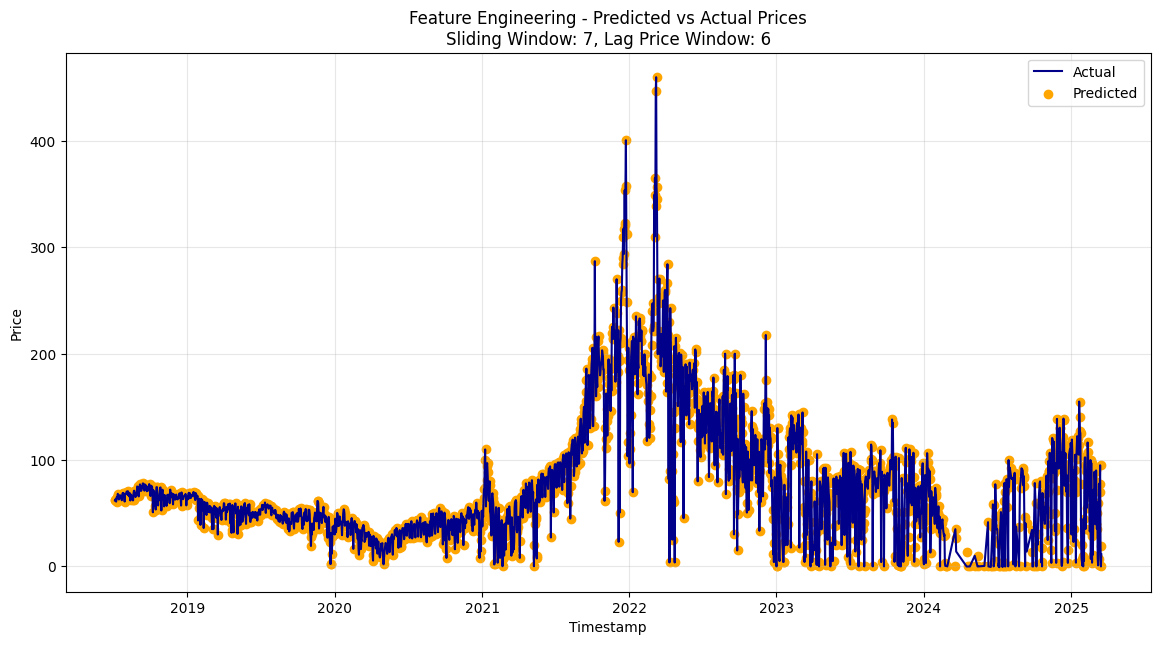

In [13]:
import matplotlib.pyplot as plt
# Plotting the predictions for the best model as scatter plot over the actuals as line plot
plt.figure(figsize=(14, 7))
plt.plot(prediction_df_best_fe['Timestamp'], prediction_df_best_fe['Actual'], label='Actual', color='darkblue')
plt.scatter(prediction_df_best_fe['Timestamp'], prediction_df_best_fe['Predicted'], label='Predicted', color='orange')
plt.title(f"Feature Engineering - Predicted vs Actual Prices\nSliding Window: {best_fe_sliding_window}, Lag Price Window: {best_fe_lag_price_window}")
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('regression_fe_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# COMPREHENSIVE VERIFICATION TEST - Test both 99th percentile filtering AND 95th percentile worst errors
def comprehensive_verification_test():
    """
    Test the verification function for both:
    1. 99th percentile filtering (keeping best 99% of predictions)
    2. 95th percentile worst errors (worst 5% within that filtered subset)
    """
    
    print("=== COMPREHENSIVE VERIFICATION TEST ===")
    
    # Get the best model parameters
    best_sliding_window = int(pareto_fe.head(1)['sliding_window'].values[0])
    best_lag_window = int(pareto_fe.head(1)['lag_price_window'].values[0])
    
    # Step 1: Generate full unfiltered predictions (same as comprehensive results)
    print(f"\n1. Generating full predictions with sliding_window={best_sliding_window}, lag_window={best_lag_window}")
    prediction_df_full = regression_training(df, best_sliding_window, best_lag_window, DEBUG=False)
    
    full_predictions = prediction_df_full['Predicted'].values
    full_actuals = prediction_df_full['Actual'].values
    full_errors = np.abs(full_predictions - full_actuals)
    
    print(f"   Full dataset size: {len(full_predictions)}")
    print(f"   Full error range: {np.min(full_errors):.2f} to {np.max(full_errors):.2f}")
    
    # Step 2: Apply 99th percentile filtering (keep best 99%)
    print(f"\n2. Applying 99th percentile filtering (keep best 99% predictions)")
    percentile_99_threshold = np.percentile(full_errors, 99)
    best_99_indices = full_errors <= percentile_99_threshold
    
    filtered_predictions = full_predictions[best_99_indices]
    filtered_actuals = full_actuals[best_99_indices]
    filtered_errors = full_errors[best_99_indices]
    
    print(f"   99th percentile error threshold: {percentile_99_threshold:.2f}")
    print(f"   Filtered dataset size: {len(filtered_predictions)} ({len(filtered_predictions)/len(full_predictions)*100:.1f}%)")
    print(f"   Filtered error range: {np.min(filtered_errors):.2f} to {np.max(filtered_errors):.2f}")
    
    # Step 3: Calculate worst 5% errors WITHIN the filtered 99% subset
    print(f"\n3. Calculating worst 5% errors WITHIN the filtered 99% subset")
    
    # Method 1: Using percentile threshold (current method)
    worst_5_threshold = np.percentile(filtered_errors, 95)
    worst_5_indices = filtered_errors >= worst_5_threshold
    worst_5_errors_method1 = filtered_errors[worst_5_indices]
    avg_worst_5_method1 = np.mean(worst_5_errors_method1)
    
    # Method 2: Direct sorting
    num_worst_5 = int(len(filtered_errors) * 0.05)  # 5% of filtered data
    sorted_filtered_errors = np.sort(filtered_errors)[::-1]  # Descending order
    worst_5_errors_method2 = sorted_filtered_errors[:num_worst_5]
    avg_worst_5_method2 = np.mean(worst_5_errors_method2)
    
    # Method 3: Using argsort
    worst_5_indices_method3 = np.argsort(filtered_errors)[-num_worst_5:]
    worst_5_errors_method3 = filtered_errors[worst_5_indices_method3]
    avg_worst_5_method3 = np.mean(worst_5_errors_method3)
    
    print(f"   95th percentile threshold in filtered data: {worst_5_threshold:.2f}")
    print(f"   Number of worst 5% predictions: {len(worst_5_errors_method1)} (expected: {num_worst_5})")
    print(f"   Actual percentage: {len(worst_5_errors_method1)/len(filtered_errors)*100:.2f}%")
    
    print(f"\n   Average worst 5% error (Method 1 - Percentile): {avg_worst_5_method1:.2f}")
    print(f"   Average worst 5% error (Method 2 - Direct Sort): {avg_worst_5_method2:.2f}")
    print(f"   Average worst 5% error (Method 3 - Argsort): {avg_worst_5_method3:.2f}")
    
    methods_match = np.allclose([avg_worst_5_method1, avg_worst_5_method2, avg_worst_5_method3], 
                               avg_worst_5_method1, rtol=1e-5)
    print(f"   All methods match: {methods_match}")
    
    # Step 4: Compare with stored comprehensive results
    print(f"\n4. Comparing with stored comprehensive results")
    stored_result = comprehensive_fe_df[
        (comprehensive_fe_df['sliding_window'] == best_sliding_window) & 
        (comprehensive_fe_df['lag_price_window'] == best_lag_window) & 
        (comprehensive_fe_df['percentile'] == 99)
    ]
    
    if len(stored_result) > 0:
        stored_worst_avg = stored_result['worst_avg_error'].values[0]
        stored_data_points = stored_result['data_points'].values[0]
        
        print(f"   Stored worst_avg_error (99th percentile): {stored_worst_avg:.2f}")
        print(f"   Calculated worst_avg_error: {avg_worst_5_method1:.2f}")
        print(f"   Stored data_points: {stored_data_points}")
        print(f"   Calculated data_points: {len(filtered_predictions)}")
        
        results_match = np.allclose(stored_worst_avg, avg_worst_5_method1, rtol=1e-3)
        data_points_match = stored_data_points == len(filtered_predictions)
        
        print(f"   Results match: {results_match}")
        print(f"   Data points match: {data_points_match}")
        
        if results_match and data_points_match:
            print(f"   ✅ VERIFICATION SUCCESSFUL!")
        else:
            print(f"   ❌ VERIFICATION FAILED!")
    else:
        print(f"   ❌ No stored result found for comparison!")
    
    # Step 5: Also verify the overall (100th percentile) calculation
    print(f"\n5. Verifying overall (100th percentile) calculation")
    
    # Calculate worst 5% of ALL data (not filtered)
    full_worst_5_threshold = np.percentile(full_errors, 95)
    full_worst_5_indices = full_errors >= full_worst_5_threshold
    full_avg_worst_5 = np.mean(full_errors[full_worst_5_indices])
    
    # Compare with stored overall result
    stored_overall = comprehensive_fe_df[
        (comprehensive_fe_df['sliding_window'] == best_sliding_window) & 
        (comprehensive_fe_df['lag_price_window'] == best_lag_window) & 
        (comprehensive_fe_df['percentile'] == 100)
    ]
    
    if len(stored_overall) > 0:
        stored_overall_worst = stored_overall['worst_avg_error'].values[0]
        print(f"   Stored worst_avg_error (100th percentile): {stored_overall_worst:.2f}")
        print(f"   Calculated worst_avg_error (full data): {full_avg_worst_5:.2f}")
        
        overall_match = np.allclose(stored_overall_worst, full_avg_worst_5, rtol=1e-3)
        print(f"   Overall results match: {overall_match}")
        
        if overall_match:
            print(f"   ✅ OVERALL VERIFICATION SUCCESSFUL!")
        else:
            print(f"   ❌ OVERALL VERIFICATION FAILED!")
    
    return {
        'filtered_99_match': results_match if len(stored_result) > 0 else False,
        'overall_100_match': overall_match if len(stored_overall) > 0 else False,
        'methods_consistent': methods_match
    }

# Run the comprehensive verification test
verification_summary = comprehensive_verification_test()

print(f"\n=== VERIFICATION SUMMARY ===")
print(f"99th percentile filtering + worst 5%: {'✅ PASS' if verification_summary['filtered_99_match'] else '❌ FAIL'}")
print(f"100th percentile (overall) worst 5%: {'✅ PASS' if verification_summary['overall_100_match'] else '❌ FAIL'}")
print(f"All calculation methods consistent: {'✅ PASS' if verification_summary['methods_consistent'] else '❌ FAIL'}")

=== COMPREHENSIVE VERIFICATION TEST ===

1. Generating full predictions with sliding_window=7, lag_window=6
Number of models to train: 2252
   Full dataset size: 2252
   Full error range: 0.00 to 226.30

2. Applying 99th percentile filtering (keep best 99% predictions)
   99th percentile error threshold: 104.20
   Filtered dataset size: 2229 (99.0%)
   Filtered error range: 0.00 to 104.03

3. Calculating worst 5% errors WITHIN the filtered 99% subset
   95th percentile threshold in filtered data: 58.34
   Number of worst 5% predictions: 112 (expected: 111)
   Actual percentage: 5.02%

   Average worst 5% error (Method 1 - Percentile): 75.70
   Average worst 5% error (Method 2 - Direct Sort): 75.86
   Average worst 5% error (Method 3 - Argsort): 75.86
   All methods match: False

4. Comparing with stored comprehensive results
   Stored worst_avg_error (99th percentile): 75.70
   Calculated worst_avg_error: 75.70
   Stored data_points: 2229
   Calculated data_points: 2229
   Results matc